In [1]:
library(Seurat)
seurat = readRDS('GSE120575_8.RDS')

Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp



In [2]:
source("L:/Duncan/kptumors_figures/figure_parameters.R")
Axis_themes = Axis_themes + theme(plot.title = element_text(size = 6),
                     axis.title = element_text(size = 6), 
                     axis.text = element_text(size = 6),
                     axis.text.x = element_text(size = 6),
                     legend.text = element_text(size =6),
                     legend.title = element_text(size =6 ),
                     strip.text.x = element_text(size = 6), 
                     axis.line =element_line(size = .1167), 
                     axis.ticks = element_line(size = .1167)) 

UMAP_theme = theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.25),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

Loading required package: ggplot2



In [3]:
metadata = read.csv('metadata.csv')
rownames(metadata) = metadata$Patient.ID
head(metadata)
table(metadata$Clinical.response..RECIST..R.CR..PR..NR.SD..PD.	)

,X.,Patient.ID,Gender..F.M.,Age,Therapy,Clinical.response..RECIST..R.CR..PR..NR.SD..PD.,Baseline.Biopsy..days.from.baseline..site..lesion.response.,Post.I.biopsy..days.from.baseline..site..lesion.response.,Post.II.biopsy..days.from.baseline..site..lesion.response.,WES,Overall.survival..days.,Status..Alive.0..Dead.1.,Mutations.indels.in.known.melanoma.drivers,Mutations.indels.in.antigen.presentation.and.or.interferon.gamma.pathways
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
P1,1,P1,M,49,CTLA4 (baseline); PD1 (post I and II),Resistance,0; right chest; regression,48; anterior neck; regression,437; anterior neck; progression,Y,822,0,"BRAF, CDKN2A","IFI16, IFIH1, STAT4"
P2,2,P2,M,75,PD1,NR,0; small bowel; progression,35; left axilla; progression,NA,Y,347,1,"BRAF, PTEN",ND
P3,3,P3,F,83,PD1,NR,0; right anterior lower leg; progression,63; right distal anterior thigh; progression,161; right anterior knee; progression,Y,521,1,"HRAS, NRAS, RPTN, TP53, TPTE","IFNA2, IL21R, IL2RB, STAT4, TYK2, B2M"
P4,4,P4,M,29,CTLA4+PD1,R,(-2); left shoulder; progression prior to therapy,35; left shoulder; regression,NA,Y,539,0,"BRAF, CDKN2A, TPTE",ND
P5,5,P5,M,33,PD1,NR (patient had mix response),NA,199; Post_P#5- right iliac soft tissue mass; progression. Post_P#5_2- right buttock; regression,NA,Y,369,1,"BRAF, TP53",ND
P6,6,P6,F,66,CTLA4 (baseline) ; PD1 (post I),NR,(-70); left upper back; progression,270; right colectomy mass in cecum; progression,NA,Y,777,0,"BRAF, NRAS","CANX, PTK2"



                           NR NR (patient had mix response) 
                           15                             4 
                            R                    Resistance 
                           11                             2 

In [4]:
samples = read.csv('sample_sheet.csv')
rownames(samples) = samples$title

head(samples)

,Sample.name,title,source.name,organism,characteristics..patinet.ID..Pre.baseline..Post..on.treatment.,characteristics..response,characteristics..therapy,molecule,description,processed.data.file,raw.file
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
A10_P3_M11,Sample 1,A10_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti.CTLA4,NA,NA,NA,NA
A11_P1_M11,Sample 2,A11_P1_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti.CTLA4,NA,NA,NA,NA
A11_P3_M11,Sample 3,A11_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti.CTLA4,NA,NA,NA,NA
A11_P4_M11,Sample 4,A11_P4_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti.CTLA4,NA,NA,NA,NA
A12_P3_M11,Sample 5,A12_P3_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti.CTLA4,NA,NA,NA,NA
A12_P6_M11,Sample 6,A12_P6_M11,Melanoma single cell,Homo sapiens,Pre_P1,Responder,anti.CTLA4,NA,NA,NA,NA


In [5]:
library(stringr)
seurat@meta.data$patient = samples[rownames(seurat@meta.data), 'characteristics..patinet.ID..Pre.baseline..Post..on.treatment.']
seurat@meta.data$patient = sapply(seurat@meta.data$patient, function(x) str_split(x, '_')[[1]][2])
seurat@meta.data$response = metadata[seurat@meta.data$patient, 6]
                                  
                      
                                  

In [6]:
treg = subset(seurat, cells = colnames(seurat)[Idents(seurat) == 2])

In [7]:
library(GSA)
hallmark = GSA.read.gmt("L:/Duncan/eoe_sciimmunol/figures/figure 2/hallmark.gmt")
for (i in 1:length(hallmark$geneset.names)) {
  treg = AddModuleScore(treg, features = hallmark[[1]][i], name= hallmark$geneset.names[i])
}


Warning message:
"package 'GSA' was built under R version 4.1.3"


12345678910111213141516171819202122232425262728293031323334353637383940414243444546474849501
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


Warning message:
"The following features are not present in the object: ADIG, ATP5PO, CAVIN1, CAVIN2, GPAT4, MARC2, MIGA2, SQOR, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: CARTPT, CCL11, FYB1, IL9, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: AL162171.1, GUCY1A1, PLPP1, SELENOP, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: APOH, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: ADRA1B, CLDN6, CLDN8, FYB1, MAP3K20, NECTIN1, NECTIN2, NECTIN3, NECTIN4, PECAM1, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: CRYBG1, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: AVPR1A, IFNB1, PLPPR4, not searching for symbol synonyms"
Warning messa

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggbeeswarm' was built under R version 4.1.3"
`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."


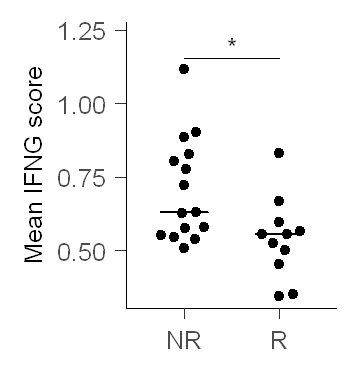

In [8]:
library(dplyr)
library(ggpubr)
library(ggplot2)
library(ggbeeswarm)
options(repr.plot.res = 300, repr.plot.width = 1.2, repr.plot.height = 1.25)



df = treg@meta.data %>%filter(response %in% c('R', 'NR')) %>% group_by(patient,response) %>% summarize(mean = mean(HALLMARK_INTERFERON_GAMMA_RESPONSE1), n = n())
g = ggplot(df, aes(x = response, y = mean)) + geom_beeswarm(cex = 7, size = .8)  + stat_compare_means(comparisons = list(c(1,2)), method.args = list(alternative = 'greater'), bracket.size = .1167, tip.length = 0, label = 'p.signif', method = 'wilcox') + theme_classic() + 
theme(axis.text.x = element_text(angle = 0)) + labs(x = c(), y = 'Mean IFNG score') + 
scale_x_discrete(limits = c('NR', 'R')) + Axis_themes + scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median,
                 geom = "crossbar", width = 0.5, size = .1167)

g$layers[[2]]$aes_params$textsize <- 2.1167
g

ggsave('ifng.pdf', height =1.25 , width = 1.2, useDingbats = FALSE)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."


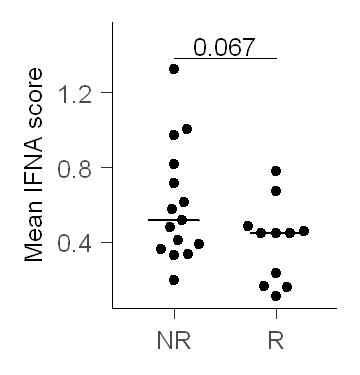

In [9]:
library(dplyr)
library(ggpubr)
library(ggplot2)
library(ggbeeswarm)
options(repr.plot.res = 300, repr.plot.width = 1.2, repr.plot.height = 1.25)



df = treg@meta.data %>%filter(response %in% c('R', 'NR')) %>% group_by(patient,response) %>% summarize(mean = mean(HALLMARK_INTERFERON_ALPHA_RESPONSE1), n = n())

g2 = ggplot(df, aes(x = response, y = mean)) + geom_beeswarm(cex = 7, size = .8)  + stat_compare_means(comparisons = list(c(1,2)), method.args = list(alternative = 'greater'), bracket.size = .1167, tip.length = 0, method = 'wilcox') + theme_classic() + 
theme(axis.text.x = element_text(angle = 0)) + labs(x = c(), y = 'Mean IFNA score') + 
scale_x_discrete(limits = c('NR', 'R')) + Axis_themes + scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median,
                 geom = "crossbar", width = 0.5, size = .1167)

g2$layers[[2]]$aes_params$textsize <- 2.1167
g2

ggsave('ifna.pdf', height =1.25 , width = 1.2, useDingbats = FALSE)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."
`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."
Warning message:
"Removed 6 rows containing non-finite values (stat_signif)."
Warning message in wilcox.test.default(c(NA, 0.642857142857143, 0.125, 0.604166666666667, :
"cannot compute exact p-value with ties"
Warning message:
"Removed 6 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 6 rows c

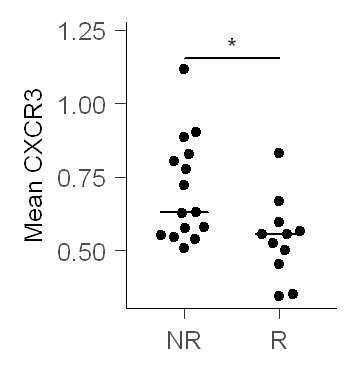

Warning message:
"Removed 6 rows containing non-finite values (stat_signif)."
Warning message in wilcox.test.default(c(NA, 0.642857142857143, 0.125, 0.604166666666667, :
"cannot compute exact p-value with ties"
Warning message:
"Removed 6 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 6 rows containing missing values (position_beeswarm)."


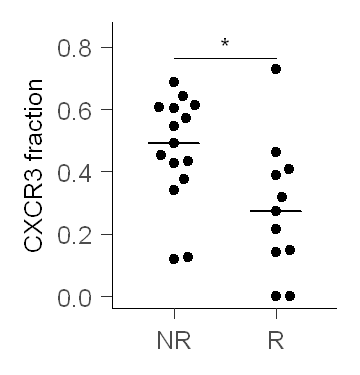

In [10]:
gene = 'CXCR3'
treg$gene = GetAssayData(treg)[gene,colnames(treg)]
df = treg@meta.data %>% group_by(patient,response) %>% summarize(mean = mean(gene))

df = treg@meta.data %>%filter(response %in% c('R', 'NR')) %>% group_by(patient,response) %>% summarize(mean = mean(HALLMARK_INTERFERON_GAMMA_RESPONSE1), n = n())
g4 = ggplot(df, aes(x = response, y = mean)) + geom_beeswarm(cex = 7, size = .8)  + stat_compare_means(comparisons = list(c(1,2)), method.args = list(alternative = 'greater', bracket.size = .1167), tip.length = 0, label = 'p.signif', method = 'wilcox') + theme_classic() + 
theme(axis.text.x = element_text(angle = 0)) + labs(x = c(), y = 'Mean CXCR3') + 
scale_x_discrete(limits = c('NR', 'R')) + Axis_themes + scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median,
                 geom = "crossbar", width = 0.5, size = .1167)

g4$layers[[2]]$aes_params$textsize <- 2.1167
g4

ggsave('cxcr3_exp.pdf', height =1.25 , width = 1.2, useDingbats = FALSE)

df = treg@meta.data %>% group_by(patient,response) %>% summarize(mean = mean(gene > 0))
g5 = ggplot(df, aes(x = response, y = mean)) + geom_beeswarm(cex = 7, size = .8)  + stat_compare_means(comparisons = list(c(1,2)), method.args = list(alternative = 'greater'), bracket.size = .1167, tip.length = 0, label = 'p.signif', method = 'wilcox') + theme_classic() + 
theme(axis.text.x = element_text(angle = 0)) + labs(x = c(), y = 'CXCR3 fraction') + 
scale_x_discrete(limits = c('NR', 'R')) + Axis_themes + scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median,
                 geom = "crossbar", width = 0.5, size = .1167)

g5$layers[[2]]$aes_params$textsize <- 2.1167
g5

ggsave('cxcr3_frac.pdf', height =1.25 , width = 1.2, useDingbats = FALSE)

In [11]:
cd8 = readRDS('GSE120575_6_CD8_wPCA_wClust_wEmbed.rds')

In [12]:
cd8@meta.data$patient = seurat@meta.data[rownames(cd8@meta.data), 'patient']
cd8@meta.data$resp = seurat@meta.data[rownames(cd8@meta.data), 'response']




`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."
Warning message:
"Removed 6 rows containing non-finite values (stat_signif)."
Warning message:
"Removed 6 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 6 rows containing missing values (position_beeswarm)."
Warning message:
"Removed 6 rows containing non-finite values (stat_signif)."
Warning message:
"Removed 6 rows containing non-finite values (stat_summary)."
Warning message:
"Removed 6 rows containing missing values (position_beeswarm)."


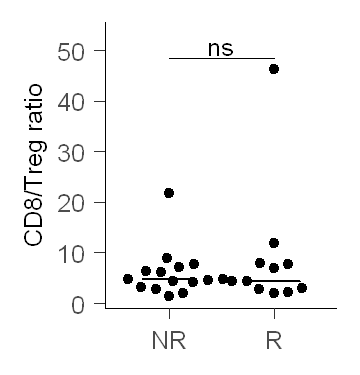

In [13]:
options(repr.plot.res = 300, repr.plot.width = 1.2, repr.plot.height = 1.25)

seurat@meta.data$cd8 = as.numeric(rownames(seurat@meta.data) %in% rownames(cd8@meta.data))
df = seurat@meta.data %>% group_by(patient, response) %>% summarize(treg = sum(RNA_snn_res.0.6 == 2), cd8 = sum(cd8))
g6 = ggplot(df, aes(x = response, y = cd8/treg)) + geom_beeswarm(cex = 7, size = .8)  + stat_compare_means(comparisons = list(c(1,2)), method.args = list(alternative = 'greater'), bracket.size = .1167, tip.length = 0, label = 'p.signif', method = 'wilcox') + theme_classic() + 
theme(axis.text.x = element_text(angle = 0)) + labs(x = c(), y = 'CD8/Treg ratio') + 
scale_x_discrete(limits = c('NR', 'R')) + Axis_themes + scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median,
                 geom = "crossbar", width = 0.5, size = .1167)

g6$layers[[2]]$aes_params$textsize <- 2.1167
g6

ggsave('cd8_treg.pdf', height = 1.2, width = 1.2, useDingbats = FALSE)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."


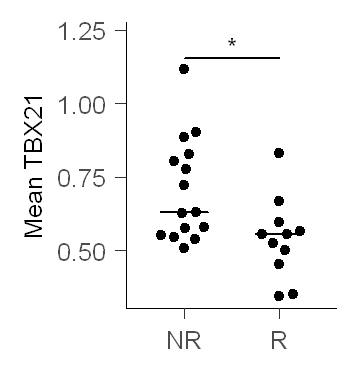

In [14]:
options(repr.plot.res = 300, repr.plot.width = 1.2, repr.plot.height = 1.25)

library(Seurat)
library(dplyr)
library(ggplot2)
library(ggbeeswarm)
library(ggpubr)
gene = 'TBX21'

treg$gene = GetAssayData(treg)[gene,colnames(treg)]
df = treg@meta.data %>% group_by(patient,response) %>% summarize(mean = mean(gene))

df = treg@meta.data %>%filter(response %in% c('R', 'NR')) %>% group_by(patient,response) %>% summarize(mean = mean(HALLMARK_INTERFERON_GAMMA_RESPONSE1), n = n())
g4 = ggplot(df, aes(x = response, y = mean)) + geom_beeswarm(cex = 7, size = .8)  + stat_compare_means(comparisons = list(c(1,2)), method.args = list(alternative = 'greater', bracket.size = .1167), tip.length = 0, label = 'p.signif', method = 'wilcox') + theme_classic() + 
theme(axis.text.x = element_text(angle = 0)) + labs(x = c(), y = 'Mean TBX21') + 
scale_x_discrete(limits = c('NR', 'R')) + Axis_themes + scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median,
                 geom = "crossbar", width = 0.5, size = .1167)

g4$layers[[2]]$aes_params$textsize <- 2.1167
g4

ggsave('treg_tbet.pdf', height = 1.2, width = 1.2, useDingbats = FALSE)